모델에서는 Time Driving(실주행시간)을 예측하고 이후에 출발시간+실주행시간으로 도착시간 예측
(참고사항: x데이터에서 Time_Departure와 Time_Arrival 컬럼을 제외한 후에 Time_Driving값(y값)을 예측하는 형태로 해결해도 무방함)

In [216]:
# 1. scikit-learn을 별칭 sk로 임포트하는 코드를 작성하고 실행하세요
import sklearn as sk
# 2. pandas를 별칭 pd로 임포트하는 코드를 작성하고 실행하세요
import pandas as pd

In [217]:
# 3. pandas 함수로 데이터 파일을 읽어 dataframe변수에 할당하는 코드를 작성하라
data = pd.read_csv("C:\\Users\\User\\미니프로젝트5\\2일차\\nav_data.csv", encoding = 'cp949')

In [218]:
df = pd.DataFrame(data)

In [219]:
df.head()

,Time_Departure,Time_Arrival,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,35:21.0,55:22.6,12914,1201.534058,38.692536,경기도,광명시,7,0,5,20
1,55:22.0,09:06.9,7483,823.817017,32.699980,서울특별시,영등포구,31,0,5,20
2,13:46.0,22:32.9,8087,526.710998,55.273575,경기도,김포시,6,0,0,20
3,13:43.0,28:42.7,10528,898.581970,42.178456,경기도,광주시,2,0,0,20
4,01:57.0,17:58.2,10636,957.758972,39.978326,경기도,안산시 상록구,28,0,0,20


In [220]:
# 4. 실주행시간과 평균시속의 분포를 같이 확인하려고 한다. Time_Driving과 Speed_Per_Hour을 jointplot 그래프로 만들어라.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55531 entries, 0 to 55530
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Time_Departure  55531 non-null  object 
 1   Time_Arrival    55531 non-null  object 
 2   Distance        55531 non-null  int64  
 3   Time_Driving    55531 non-null  float64
 4   Speed_Per_Hour  55531 non-null  float64
 5   Address1        55531 non-null  object 
 6   Address2        55531 non-null  object 
 7   Signaltype      55531 non-null  int64  
 8   Weekday         55531 non-null  int64  
 9   Hour            55531 non-null  int64  
 10  Day             55531 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 4.7+ MB


In [221]:
df.describe()

,Distance,Time_Driving,Speed_Per_Hour,Signaltype,Weekday,Hour,Day
count,55531.000000,55531.000000,55531.000000,55531.000000,55531.000000,55531.000000,55531.000000
mean,7041.212548,967.215437,29.906554,19.164197,2.379644,13.158902,22.379644
std,3265.541600,517.927018,14.444940,13.977421,1.384683,4.806116,1.384683
min,3000.000000,120.852997,2.143031,0.000000,0.000000,0.000000,20.000000
25%,4272.000000,600.340027,19.773403,9.000000,1.000000,9.000000,21.000000
50%,6153.000000,875.612976,26.771460,17.000000,3.000000,13.000000,23.000000
75%,9297.500000,1200.483033,36.671566,27.000000,4.000000,17.000000,24.000000
max,15000.000000,7966.559082,137.042329,101.000000,4.000000,23.000000,24.000000


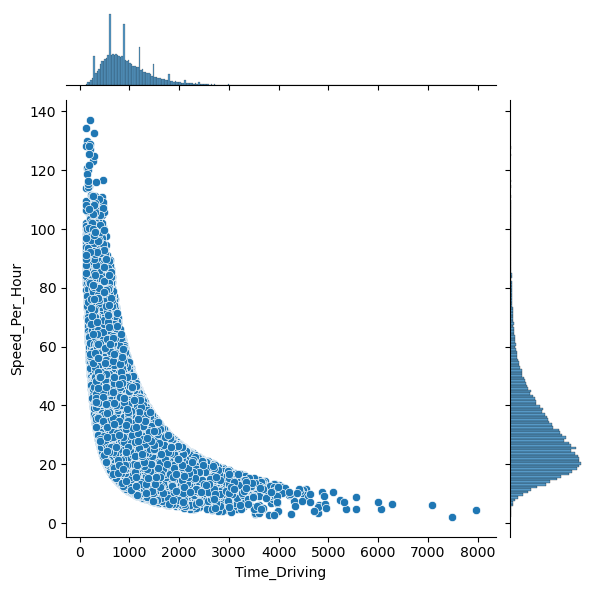

In [222]:
import seaborn as sns

sns.jointplot(x='Time_Driving', y='Speed_Per_Hour', data=df)

In [223]:
df.corr()

,Distance,Time_Driving,Speed_Per_Hour,Signaltype,Weekday,Hour,Day
Distance,1.000000,0.530000,0.311770,0.239302,-0.022608,-0.037621,-0.022608
Time_Driving,0.530000,1.000000,-0.478222,0.530018,-0.007227,0.013728,-0.007227
Speed_Per_Hour,0.311770,-0.478222,1.000000,-0.391777,0.002364,-0.054872,0.002364
Signaltype,0.239302,0.530018,-0.391777,1.000000,-0.037167,-0.001802,-0.037167
Weekday,-0.022608,-0.007227,0.002364,-0.037167,1.000000,0.013949,1.000000
Hour,-0.037621,0.013728,-0.054872,-0.001802,0.013949,1.000000,0.013949
Day,-0.022608,-0.007227,0.002364,-0.037167,1.000000,0.013949,1.000000


<AxesSubplot:>

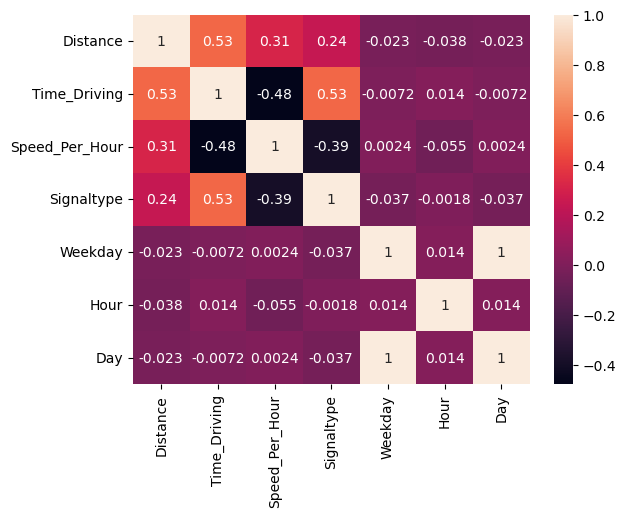

In [224]:
# 5. 데이터간 상관계수를 구하여 heatmap 그래프로 시각화해보자.
sns.heatmap(df.corr(), annot=True)

In [225]:
# Time_Departure 컬럼을 삭제하고 df_temp 데이터 프레임에 저장하라.
df_temp = df.drop(columns=['Time_Departure', 'Time_Arrival'], axis=1)

In [226]:
df_temp.head()

,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,12914,1201.534058,38.692536,경기도,광명시,7,0,5,20
1,7483,823.817017,32.699980,서울특별시,영등포구,31,0,5,20
2,8087,526.710998,55.273575,경기도,김포시,6,0,0,20
3,10528,898.581970,42.178456,경기도,광주시,2,0,0,20
4,10636,957.758972,39.978326,경기도,안산시 상록구,28,0,0,20


In [227]:
# 7. encoder를 사용하여 범주형 데이터를 수치형 데이터로 변환하라
df_temp.dtypes

Distance            int64
Time_Driving      float64
Speed_Per_Hour    float64
Address1           object
Address2           object
Signaltype          int64
Weekday             int64
Hour                int64
Day                 int64
dtype: object

In [228]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
df_temp['Address1'] = le.fit_transform(df_temp['Address1'])
df_temp['Address2'] = le.fit_transform(df_temp['Address2'])

In [229]:
df_temp.dtypes

Distance            int64
Time_Driving      float64
Speed_Per_Hour    float64
Address1            int32
Address2            int32
Signaltype          int64
Weekday             int64
Hour                int64
Day                 int64
dtype: object

In [230]:
df_temp.head()

,Distance,Time_Driving,Speed_Per_Hour,Address1,Address2,Signaltype,Weekday,Hour,Day
0,12914,1201.534058,38.692536,2,12,7,0,5,20
1,7483,823.817017,32.699980,3,57,31,0,5,20
2,8087,526.710998,55.273575,2,19,6,0,0,20
3,10528,898.581970,42.178456,2,13,2,0,0,20
4,10636,957.758972,39.978326,2,47,28,0,0,20


In [231]:
df_temp.shape

(55531, 9)

In [232]:
# 8. 원-핫 인코딩으로 컬럼 데이터를 1과 0의 이진형 벡터로 변환하라.
df_encoded = pd.get_dummies(df_temp, columns=['Weekday', 'Hour', 'Day', 'Address1', 'Address2'], drop_first=True)

In [233]:
df_encoded.shape

(55531, 118)

In [234]:
# df_encoded의 데이터를 df_temp에 할당
# df_temp[df_encoded.columns] = df_encoded

In [235]:
df_encoded.head()

,Distance,Time_Driving,Speed_Per_Hour,Signaltype,Weekday_1,Weekday_2,Weekday_3,Weekday_4,Hour_1,Hour_2,...,Address2_68,Address2_69,Address2_70,Address2_71,Address2_72,Address2_73,Address2_74,Address2_75,Address2_76,Address2_77
0,12914,1201.534058,38.692536,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7483,823.817017,32.699980,31,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8087,526.710998,55.273575,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10528,898.581970,42.178456,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10636,957.758972,39.978326,28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
df_encoded.shape

(55531, 118)

In [237]:
from sklearn.model_selection import train_test_split
target = 'Time_Driving'
x = df_encoded.drop(target, axis=1)
y = df_encoded.loc[:,target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2023)

In [238]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38871, 117), (16660, 117), (38871,), (16660,))

In [239]:
# 10. StandardScaler를 사용하여 데이터 변수를 훈련데이터셋은 정규분포화(fit_transform), 검증데이터셋은 표준화(transform)하여라.
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# 훈련데이터셋에 대해 정규화 및 표준화
# 주소컬럼만
x_train_scaled = scaler.fit_transform(x_train)
# y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1,1))

# 검증데이터셋에 대해 표준화
x_test_scaled = scaler.transform(x_test)
# y_test_scaled = scaler.transform(y_test.values.reshape(-1,1))

In [240]:
# Time_Driving컴럼을 Label로, 나머지 컬럼을 Feature로 할당한 후, max_depth 5로 decision tree로 머신러닝 모델을 만들고 학습을 진행하라.
from sklearn.tree import DecisionTreeRegressor

# 모델 생성
dt = DecisionTreeRegressor(max_depth=5)

# 모델 학습
dt.fit(x_train_scaled, y_train)

DecisionTreeRegressor(max_depth=5)

In [245]:
# 12. 머신러닝 모델에 대해 RMSE, R-squred 값 출력, scatter plot을 이용하여 x축에 실제 y값 및 y축에 예측값 시각화
# 검증데이터셋에 대해 예측값 계산
y_pred = dt.predict(x_test_scaled)

In [246]:
from sklearn.metrics import mean_squared_error, r2_score

# RMSE 계산
rmse = mean_squared_error(y_test, y_pred, squared=True) ** 0.5

# R-squared 값 계산
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

RMSE: 161.30
R-squared: 0.91


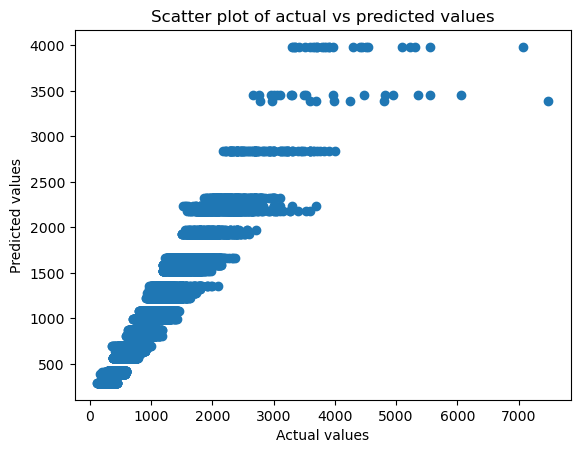

In [247]:
# scatter plot을 이용하여 x축에 실제 y값, y축에 예측값을 시각화해보겠습니다.
import matplotlib.pyplot as plt

# scatter plot
plt.scatter(y_test, y_pred)

# x=y line
# plt.plot([-3, 3], [-3, 3], '--', color='gray')
plt.plot()

# labels
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Scatter plot of actual vs predicted values")

plt.show()

In [208]:
x_train_scaled, y_train

(array([[-1.18175832e+00,  1.94361170e-01, -2.31134560e-01, ...,
         -1.24892178e-01, -5.07215749e-03, -2.32041000e-01],
        [-3.92728079e-01, -3.10110692e-01, -7.31166525e-01, ...,
         -1.24892178e-01, -5.07215749e-03, -2.32041000e-01],
        [-6.34549782e-02, -1.02297856e+00,  1.62612702e+00, ...,
         -1.24892178e-01, -5.07215749e-03, -2.32041000e-01],
        ...,
        [-6.68242844e-02,  7.23864487e-01, -1.08833221e+00, ...,
         -1.24892178e-01, -5.07215749e-03, -2.32041000e-01],
        [-1.13948884e+00, -6.90933837e-01, -1.37406477e+00, ...,
         -1.24892178e-01, -5.07215749e-03, -2.32041000e-01],
        [-3.68068296e-02, -3.05130459e-01,  1.48326075e+00, ...,
          8.00690657e+00, -5.07215749e-03, -2.32041000e-01]]),
 14330     350.462006
 8279      816.426025
 43461    1629.324951
 51344     394.306000
 28831     311.279999
             ...     
 38817    1459.000000
 51895    1713.614990
 47558     609.216003
 22041     600.609985
 54103   

In [248]:
# 13. 딥러닝 모델을 만들어라. (earlystopping 콜백 적용, modelcheckpoint 콜백 적용, validation performance가 좋은 모델을 best_model.h5 파일로 저장)
# 하이퍼파라미터 설정 : batch_size, epochs
batch_size = 64
epochs = 50
# 모델 입력(features) 갯수 확인
num_features = x_train.shape[1]
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((38871, 117), (16660, 117), (38871,), (16660,))

In [249]:
# 라이브러리 임포트
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Tensoflow의 Sequential() 함수 선언
# 결과 저장 : model
model = Sequential()

# model.add() 함수와 Dense() 함수 사용
# 첫번째 Hidden Layer 생성시 unit 64, activation='relu', input_shape=() 입력해야 함
# 첫번째 Hidden Layer 다음에 Dropout(0.2) 추가 
model.add(Dense(64, activation='relu', input_shape=(num_features,)))
model.add(Dropout(0.2))

# 두번째 Hidden Layer 생성시 unit 32, activation='relu' 추가 
# 두번째 Hidden Layer 다음에 Dropout(0.2) 추가 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# 세번째 Hidden Layer 생성시 unit 16, activation='relu' 추가 
# 세번째 Hidden Layer 다음에 Dropout(0.2) 추가 
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))

# 마지막 Dense에서 1개만 나오므로 'sigmoid' 설정하고 0.5 이하이면 정상, 아니면 해지
model.add(Dense(1, activation='sigmoid'))

# compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# EarlyStopping, ModelCheckpoint
early_stop = EarlyStopping(monitor='val_loss', patience=10)
model_check = ModelCheckpoint('best_model.h5', save_best_only=True, save_weights_only=False, monitor='val_accuracy', mode='max', verbose=1)

# 모델 훈련
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test,y_test), callbacks=[early_stop, model_check])


Epoch 1/50
604/608 [============================>.] - ETA: 0s - loss: -38183133184.0000 - accuracy: 0.0000e+00
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to best_model.h5
608/608 [==============================] - 3s 4ms/step - loss: -39065477120.0000 - accuracy: 0.0000e+00 - val_loss: -204776521728.0000 - val_accuracy: 0.0000e+00
Epoch 2/50
607/608 [============================>.] - ETA: 0s - loss: -1232438427648.0000 - accuracy: 0.0000e+00
Epoch 2: val_accuracy did not improve from 0.00000
608/608 [==============================] - 2s 4ms/step - loss: -1233271128064.0000 - accuracy: 0.0000e+00 - val_loss: -3093335375872.0000 - val_accuracy: 0.0000e+00
Epoch 3/50
605/608 [============================>.] - ETA: 0s - loss: -7455126847488.0000 - accuracy: 0.0000e+00
Epoch 3: val_accuracy did not improve from 0.00000
608/608 [==============================] - 2s 4ms/step - loss: -7479304912896.0000 - accuracy: 0.0000e+00 - val_loss: -13555620380672.0000 - val_accura

602/608 [============================>.] - ETA: 0s - loss: -12204798111645696.0000 - accuracy: 0.0000e+00
Epoch 25: val_accuracy did not improve from 0.00000
608/608 [==============================] - 3s 5ms/step - loss: -12207453475176448.0000 - accuracy: 0.0000e+00 - val_loss: -13051091352551424.0000 - val_accuracy: 0.0000e+00
Epoch 26/50
602/608 [============================>.] - ETA: 0s - loss: -13887192636063744.0000 - accuracy: 0.0000e+00
Epoch 26: val_accuracy did not improve from 0.00000
608/608 [==============================] - 3s 4ms/step - loss: -13884799265538048.0000 - accuracy: 0.0000e+00 - val_loss: -14822851261497344.0000 - val_accuracy: 0.0000e+00
Epoch 27/50
600/608 [============================>.] - ETA: 0s - loss: -15838547676233728.0000 - accuracy: 0.0000e+00
Epoch 27: val_accuracy did not improve from 0.00000
608/608 [==============================] - 3s 4ms/step - loss: -15832801009991680.0000 - accuracy: 0.0000e+00 - val_loss: -16770084206804992.0000 - val_accu

Epoch 49/50
599/608 [============================>.] - ETA: 0s - loss: -118582028407930880.0000 - accuracy: 0.0000e+00
Epoch 49: val_accuracy did not improve from 0.00000
608/608 [==============================] - 2s 3ms/step - loss: -118512776355250176.0000 - accuracy: 0.0000e+00 - val_loss: -122421926739050496.0000 - val_accuracy: 0.0000e+00
Epoch 50/50
605/608 [============================>.] - ETA: 0s - loss: -126977727398936576.0000 - accuracy: 0.0000e+00
Epoch 50: val_accuracy did not improve from 0.00000
608/608 [==============================] - 2s 3ms/step - loss: -126994168533745664.0000 - accuracy: 0.0000e+00 - val_loss: -131160544508903424.0000 - val_accuracy: 0.0000e+00


In [252]:
# 14. 딥러닝 모델 훈련데이터셋의 mae와 검증데이터셋의 val_mae를 1개의 그래프에 표시하여라.(mae, val_mae 범례를 표시하고, 그래프의 타이틀은 Training mae로 표시, x축에는 Epochs라고 표시, Y축에는 mae라고 표시)
y_pred = model.predict(x_test_scaled)

521/521 [==============================] - 1s 954us/step


In [253]:
from sklearn.metrics import mean_absolute_error

# MAE 계산
mae = mean_absolute_error(y_test, y_pred)

print("MAE:", mae)

MAE: 964.525434797527


In [258]:
mae = history.history['mae']
val_mae = history.history['val_mae']

KeyError: 'mae'

KeyError: 'val_mae'

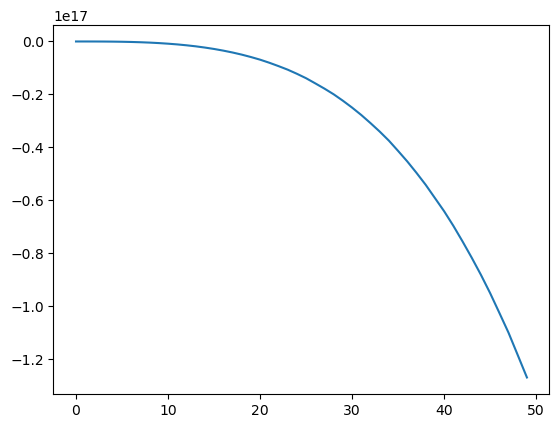

In [259]:
# 훈련데이터셋의 mae와 검증데이터셋의 val_mae를 그래프로 표시
plt.plot(history.history['loss'])
plt.plot(history.history['val_mae'])

# labels
plt.title('Training mae')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend(['mae', 'val_mae'])
plt.show()